In [1]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(viridis)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v readr   1.3.1
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v ggplot2 3.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: viridisLite


In [2]:
df=read.csv("D:/Fall 2020/Data Visualization/Project/raw.data.csv")
head(df)

ï..Day.Number Week.Number Day       Date       Month   Time..pm.
1 1             1           Wednesday 10/21/2020 October 1:00     
2 2             1           Thursday  10/22/2020 October 1:00     
3 3             1           Friday    10/23/2020 October 1:00     
4 4             1           Saturday  10/24/2020 October 1:00     
5 5             1           Sunday    10/25/2020 October 1:00     
6 6             1           Monday    10/26/2020 October 1:00     
  Temperature.celsius. Meter.Reading..watt.hour.
1 31                   83735                    
2 31                   83745                    
3 31                   83750                    
4 27                   83763                    
5 27                   83783                    
6 28                   83787

### To get the daily energy consumption, we should get the difference in meter reading between two consecutive days.The energy consumption of the first day only will be set to zero.

In [3]:
df2<-df
energy_consumption<-c(0) #list stores the daily consumption
for (i in 1:nrow(df2)-1) {
    temp<-df2[i+1,8]-df2[i,8]
    energy_consumption=c(energy_consumption,temp)
}

In [4]:
length(energy_consumption) # ensure that the list contains the daily energy consumption for the whole month

[1] 31

In [5]:
df2=cbind(df2, energy_consumption)

In [6]:
# To make sure that the column of daily energy consumption is added
head(df2)

ï..Day.Number Week.Number Day       Date       Month   Time..pm.
1 1             1           Wednesday 10/21/2020 October 1:00     
2 2             1           Thursday  10/22/2020 October 1:00     
3 3             1           Friday    10/23/2020 October 1:00     
4 4             1           Saturday  10/24/2020 October 1:00     
5 5             1           Sunday    10/25/2020 October 1:00     
6 6             1           Monday    10/26/2020 October 1:00     
  Temperature.celsius. Meter.Reading..watt.hour. energy_consumption
1 31                   83735                      0                
2 31                   83745                     10                
3 31                   83750                      5                
4 27                   83763                     13                
5 27                   83783                     20                
6 28                   83787                      4

In [7]:
write.csv(df2,"D:/Fall 2020/Data Visualization/Project/df energy.csv", row.names = FALSE)

Changing the name of columns to be more meaningful:

In [8]:
colnames(df2)=c('day_number','week_number','day','date','month','time_pm','temperature_celsius','meter_reading_watt_per_hour)','daily_energy_consumption_watt_per_hour')
head(df2)

day_number week_number day       date       month   time_pm
1 1          1           Wednesday 10/21/2020 October 1:00   
2 2          1           Thursday  10/22/2020 October 1:00   
3 3          1           Friday    10/23/2020 October 1:00   
4 4          1           Saturday  10/24/2020 October 1:00   
5 5          1           Sunday    10/25/2020 October 1:00   
6 6          1           Monday    10/26/2020 October 1:00   
  temperature_celsius meter_reading_watt_per_hour)
1 31                  83735                       
2 31                  83745                       
3 31                  83750                       
4 27                  83763                       
5 27                  83783                       
6 28                  83787                       
  daily_energy_consumption_watt_per_hour
1  0                                    
2 10                                    
3  5                                    
4 13                                    
5 20                                    
6  4

### Forecasting the weekly energy consumption.

#### First, let's display the data for week 1: a line plot that shows the daily energy consumption and a scatter plot between temperature and the daily energy consumption of the first week.

In [9]:
week1<-subset(df2,df2$week_number==1) #data frame that contains data for week 1

In [10]:
week1

day_number week_number day       date       month   time_pm
1 1          1           Wednesday 10/21/2020 October 1:00   
2 2          1           Thursday  10/22/2020 October 1:00   
3 3          1           Friday    10/23/2020 October 1:00   
4 4          1           Saturday  10/24/2020 October 1:00   
5 5          1           Sunday    10/25/2020 October 1:00   
6 6          1           Monday    10/26/2020 October 1:00   
7 7          1           Tuesday   10/27/2020 October 1:00   
  temperature_celsius meter_reading_watt_per_hour)
1 31                  83735                       
2 31                  83745                       
3 31                  83750                       
4 27                  83763                       
5 27                  83783                       
6 28                  83787                       
7 28                  83791                       
  daily_energy_consumption_watt_per_hour
1  0                                    
2 10                                    
3  5                                    
4 13                                    
5 20                                    
6  4                                    
7  4

In [11]:
date<-as.Date(week1$date,"%m/%d/%Y")

##### Time Series for Daily Energy Consumption of Week 1

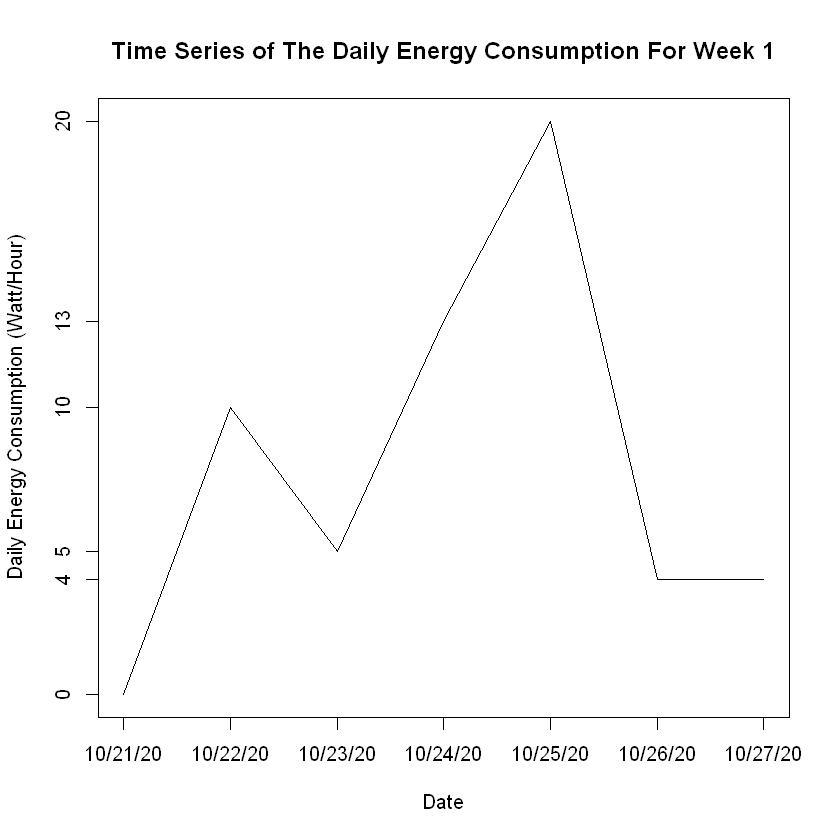

In [12]:
plot(week1$"daily_energy_consumption_watt_per_hour"~date,type='l',axes=FALSE,main="Time Series of The Daily Energy Consumption For Week 1",xlab="Date",ylab="Daily Energy Consumption (Watt/Hour)")
box()
axis(1,date,format(date,"%m/%d/%y")) #shows the month/day/last 2 digits of the year
axis(2,week1$"daily_energy_consumption_watt_per_hour")

##### Scatter Plot Between Temperature and Daily Energy Consumption of Week 1

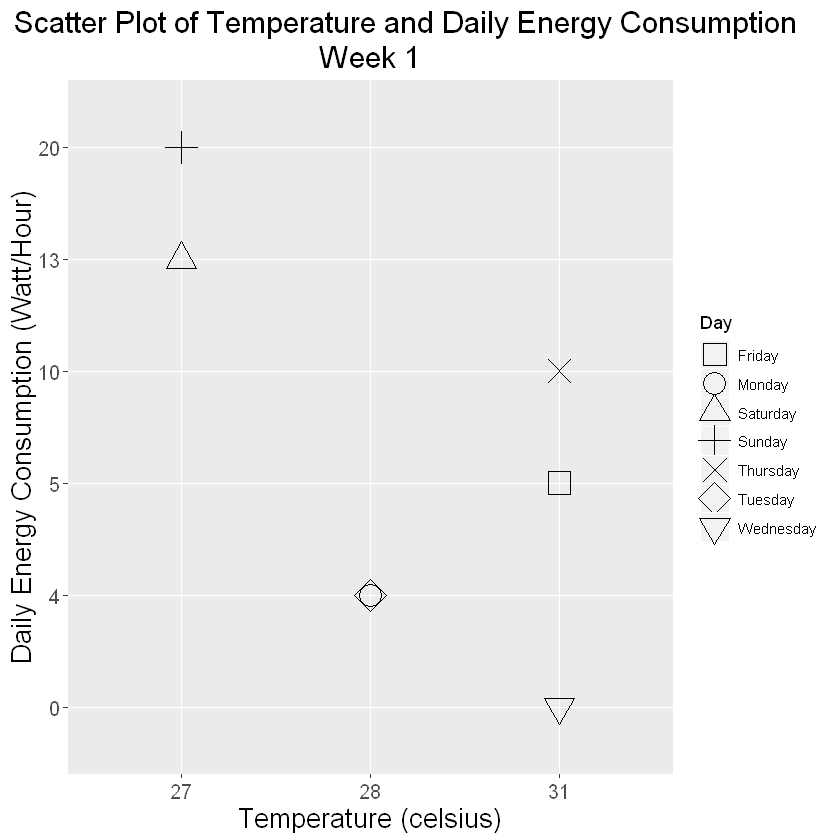

In [13]:
x1<-as.factor(week1$"temperature_celsius")
y1<-as.factor(week1$"daily_energy_consumption_watt_per_hour")
p<-ggplot(week1,aes(x=x1,y=y1,shape=day))
p+geom_point(size=6)+
xlab("Temperature (celsius)")+
ylab("Daily Energy Consumption (Watt/Hour)")+
ggtitle("Scatter Plot of Temperature and Daily Energy Consumption")+
labs(subtitle = "Week 1",shape="Day")+
scale_color_viridis(discrete=TRUE)+
scale_shape_manual(values=c(0,1,2,3,4,5,6))+
theme(plot.title=element_text(size=18,hjust=0.3),plot.subtitle=element_text(size=18,hjust=0.5),axis.text=element_text(size=12),axis.title=element_text(size=16))

From the previous scatterplot, it is obvious that there is no enough data to conclude the relationship between temperature and the daily energy consumption.

#### Secondly, let's get the linear regression for the first week so it can be used to predict the daily energy consumption of the second week.

In [14]:
cor(week1$"temperature_celsius", week1$"daily_energy_consumption_watt_per_hour") 

[1] -0.5626249

The correlation between temperature and daily energy consumption in week 1 is negative and it is not strong nor weak. Since the data collected is small, this result was expected. Now, we will use linear regression:

In [15]:
model <- lm(daily_energy_consumption_watt_per_hour ~ temperature_celsius, data=week1)

In [16]:
model


Call:
lm(formula = daily_energy_consumption_watt_per_hour ~ temperature_celsius, 
    data = week1)

Coefficients:
        (Intercept)  temperature_celsius  
                 66                   -2  


The data above can be analyzed as:

daily energy consumption(watt/hour)=66 - 2 * temperature(celsius)

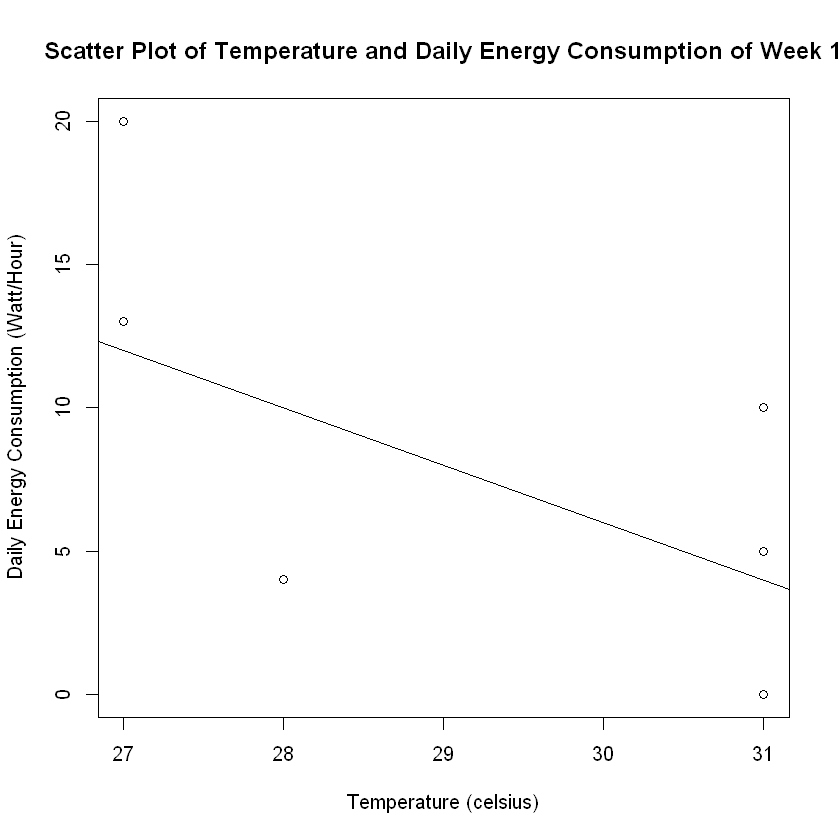

In [17]:
plot(week1$temperature_celsius,week1$daily_energy_consumption_watt_per_hour,main="Scatter Plot of Temperature and Daily Energy Consumption of Week 1",xlab="Temperature (celsius)",ylab="Daily Energy Consumption (Watt/Hour)")
abline(model) #regression line

Now, since the actual daily energy consumption has not been taken yet, let's predict the daily energy consumption for week 2 using the model and the forecast of temperatures of week 2:

In [18]:
date_week2<-subset(df2,df2$week_number==2)
date_week2<-data.frame(date_week2$date)
date_week2

date_week2.date
1 10/28/2020     
2 10/29/2020     
3 10/30/2020     
4 10/31/2020     
5 11/1/2020      
6 11/2/2020      
7 11/3/2020

In [19]:
forecast_temp<- data.frame(day = c('Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday'),week_number=c(2,2,2,2,2,2,2),date_week2,"temperature_forecast(celsius)"=c(28,28,28,27,26,26,25))
forecast_temp

day       week_number date_week2.date temperature_forecast.celsius.
1 Wednesday 2           10/28/2020      28                           
2 Thursday  2           10/29/2020      28                           
3 Friday    2           10/30/2020      28                           
4 Saturday  2           10/31/2020      27                           
5 Sunday    2           11/1/2020       26                           
6 Monday    2           11/2/2020       26                           
7 Tuesday   2           11/3/2020       25

In [20]:
colnames(forecast_temp)<-c("day","week_number","date","temperature_celsius")

In [21]:
forecast_temp

day       week_number date       temperature_celsius
1 Wednesday 2           10/28/2020 28                 
2 Thursday  2           10/29/2020 28                 
3 Friday    2           10/30/2020 28                 
4 Saturday  2           10/31/2020 27                 
5 Sunday    2           11/1/2020  26                 
6 Monday    2           11/2/2020  26                 
7 Tuesday   2           11/3/2020  25

The column needed in forecasting is temperature_celsius so there will be new dataframe that has this column only.

In [22]:
temp2=data.frame(forecast_temp['temperature_celsius'])
temp2

temperature_celsius
1 28                 
2 28                 
3 28                 
4 27                 
5 26                 
6 26                 
7 25

In [23]:
predicted_energy_consumption=predict(model, newdata = temp2)
predicted_energy_consumption

1  2  3  4  5  6  7 
10 10 10 12 14 14 16

The predicted data above shows that for Wednesday,Thursday and Friday (1,2,3), the daily energy consumption is 9.999999 watt/hour. For Saturday(4), the daily energy consumption is 12 watt/hour. For Sunday and Monday, the daily energy consumption is 14 watt/hour. For Tuesday, the daily energy consumption is 16 watt/hour.

We can use the prediction interval to find the range of daily energy consumption for each day

In [24]:
predict_week2<-predict(model, newdata = temp2, interval = "prediction")
predict_week2

fit lwr       upr     
1 10  -7.273821 27.27382
2 10  -7.273821 27.27382
3 10  -7.273821 27.27382
4 12  -6.238031 30.23803
5 14  -5.740667 33.74067
6 14  -5.740667 33.74067
7 16  -5.670010 37.67001

The above table shows that for 95% of the days with temperature 28 celsius(temperatures of Wednesday,Thursday and Friday), the daily energy consumption ranges from -7.273821 watt/hour to 27.27382 watt/hour. For 95% of the days with temperature 27 celsius(temperature of Saturday), the daily energy consumption ranges from -6.238031 watt/hour to 30.23803 watt/hour. For 95% of the days with temperature 26 celsius(temperatures of Sunday and Monday), the daily energy consumption ranges from -5.740667 watt/hour to 33.74067 watt/hour. For 95% of the days with temperature 25 celsius(temperatures of Tuesday), the daily energy consumption ranges from -5.670010 watt/hour to 37.67001 watt/hour. In general, the daily energy consumption cannot be negative, so the minimum value is 0 watt/hour.

In [25]:
week2_predicted<-forecast_temp
week2_predicted<-cbind(week2_predicted,predicted_energy_consumption)

In [26]:
week2_predicted

day       week_number date       temperature_celsius
1 Wednesday 2           10/28/2020 28                 
2 Thursday  2           10/29/2020 28                 
3 Friday    2           10/30/2020 28                 
4 Saturday  2           10/31/2020 27                 
5 Sunday    2           11/1/2020  26                 
6 Monday    2           11/2/2020  26                 
7 Tuesday   2           11/3/2020  25                 
  predicted_energy_consumption
1 10                          
2 10                          
3 10                          
4 12                          
5 14                          
6 14                          
7 16

In [27]:
colnames(week2_predicted)=c("day","week_number","date","forecast_temperature_celsius","predicted_daily_energy_consumption_watt_per_hour")
week2_predicted

day       week_number date       forecast_temperature_celsius
1 Wednesday 2           10/28/2020 28                          
2 Thursday  2           10/29/2020 28                          
3 Friday    2           10/30/2020 28                          
4 Saturday  2           10/31/2020 27                          
5 Sunday    2           11/1/2020  26                          
6 Monday    2           11/2/2020  26                          
7 Tuesday   2           11/3/2020  25                          
  predicted_daily_energy_consumption_watt_per_hour
1 10                                              
2 10                                              
3 10                                              
4 12                                              
5 14                                              
6 14                                              
7 16

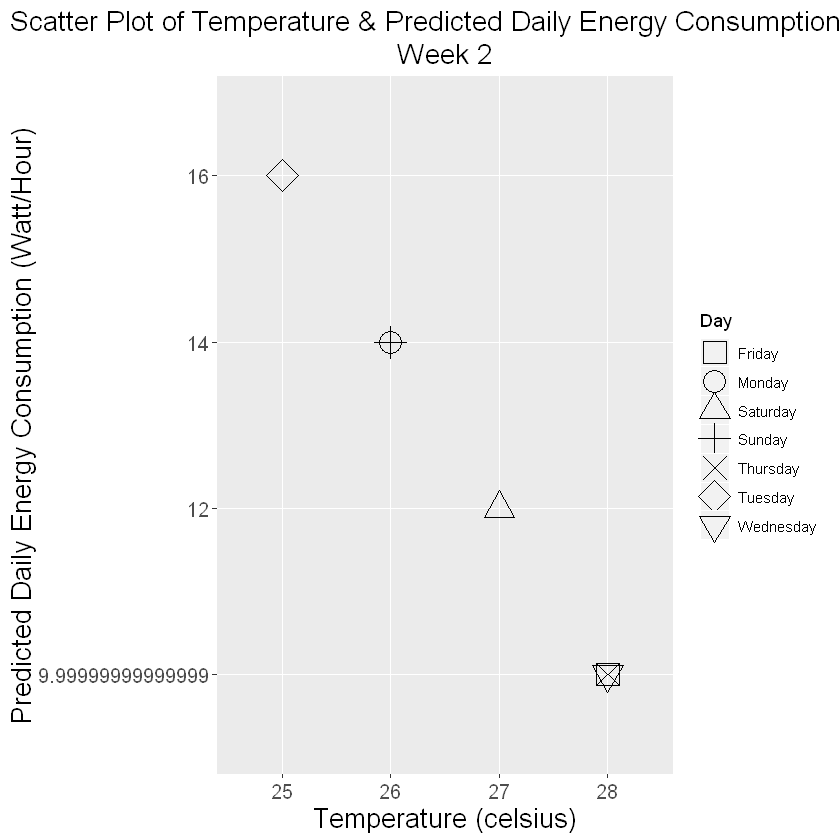

In [28]:
x1<-as.factor(week2_predicted$"forecast_temperature_celsius")
y1<-as.factor(week2_predicted$"predicted_daily_energy_consumption_watt_per_hour")
p<-ggplot(week1,aes(x=x1,y=y1,shape=day))
p+geom_point(size=6)+
xlab("Temperature (celsius)")+
ylab("Predicted Daily Energy Consumption (Watt/Hour)")+
ggtitle("Scatter Plot of Temperature & Predicted Daily Energy Consumption")+
labs(subtitle = "Week 2",shape="Day")+
scale_color_viridis(discrete=TRUE)+
scale_shape_manual(values=c(0,1,2,3,4,5,6))+
theme(plot.title=element_text(size=17,hjust=0.55),plot.subtitle=element_text(size=17,hjust=0.5),axis.text=element_text(size=12),axis.title=element_text(size=16))

In [29]:
date<-as.Date(week2_predicted$date,"%m/%d/%Y")

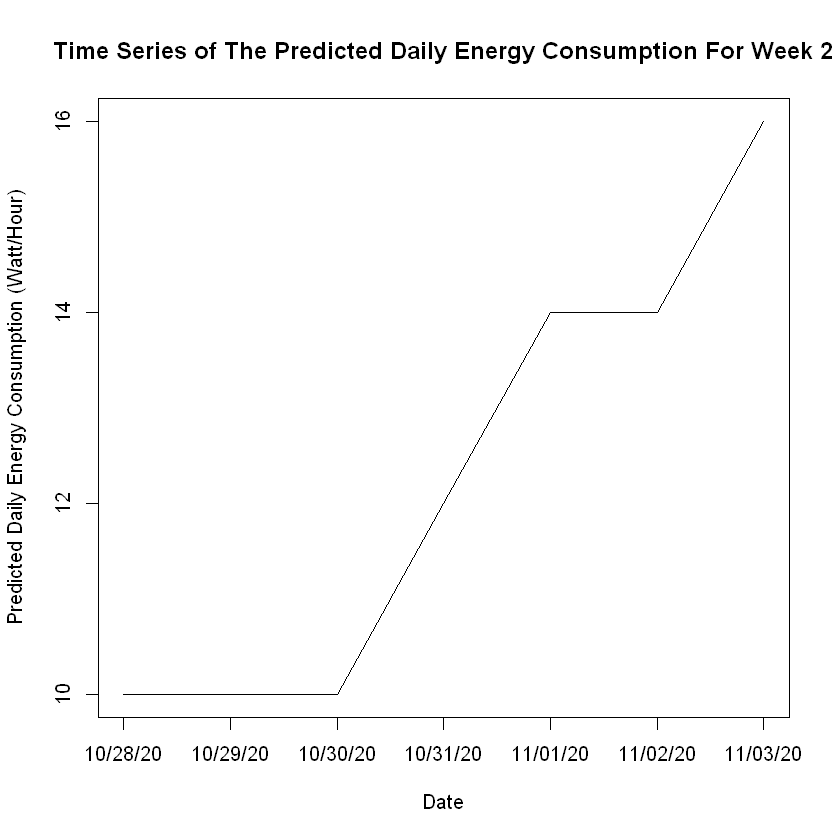

In [30]:
plot(week2_predicted$"predicted_daily_energy_consumption_watt_per_hour"~date,type='l',axes=FALSE,main="Time Series of The Predicted Daily Energy Consumption For Week 2",xlab="Date",ylab="Predicted Daily Energy Consumption (Watt/Hour)")
box()
axis(1,date,format(date,"%m/%d/%y")) #shows the month/day/last 2 digits of the year
axis(2,week2_predicted$"predicted_daily_energy_consumption_watt_per_hour")

#### Now, after having the actual data for week 2, we will  display: a line plot that shows the daily energy consumption and a scatter plot between temperature and the daily energy consumption of the second week. For each plot, there will be the predicted and the actual data.

##### Time Series for Daily Energy Consumption of Week 2

# This will be done in python. Make a data frame that includes both the predicted data and actual data

In [31]:
df_all<-week2_predicted

In [32]:
df_all

day       week_number date       forecast_temperature_celsius
1 Wednesday 2           10/28/2020 28                          
2 Thursday  2           10/29/2020 28                          
3 Friday    2           10/30/2020 28                          
4 Saturday  2           10/31/2020 27                          
5 Sunday    2           11/1/2020  26                          
6 Monday    2           11/2/2020  26                          
7 Tuesday   2           11/3/2020  25                          
  predicted_daily_energy_consumption_watt_per_hour
1 10                                              
2 10                                              
3 10                                              
4 12                                              
5 14                                              
6 14                                              
7 16

In [33]:
week2<-subset(df2,df2$week_number==2)
actual_temp<-week2$"temperature_celsius"
actual_energy_consumption<-week2$"daily_energy_consumption_watt_per_hour"
df_all<-cbind(df_all,actual_temp)
df_all<-cbind(df_all,actual_energy_consumption)
df_all

day       week_number date       forecast_temperature_celsius
1 Wednesday 2           10/28/2020 28                          
2 Thursday  2           10/29/2020 28                          
3 Friday    2           10/30/2020 28                          
4 Saturday  2           10/31/2020 27                          
5 Sunday    2           11/1/2020  26                          
6 Monday    2           11/2/2020  26                          
7 Tuesday   2           11/3/2020  25                          
  predicted_daily_energy_consumption_watt_per_hour actual_temp
1 10                                               28         
2 10                                               28         
3 10                                               28         
4 12                                               27         
5 14                                               26         
6 14                                               26         
7 16                                               25         
  actual_energy_consumption
1 13                       
2  5                       
3  6                       
4  8                       
5 10                       
6 10                       
7  5

#### The df_all data frame will be used in python to plot the predicted data against the actual data

##### Scatter Plot Between Temperature and Daily Energy Consumption of Week 2

# In python

## Forecasting week 3

#### We will create a model using the actual data of weeks 1 and 2

In [34]:
week1_2<-subset(df2,(df2$week_number==1 | df2$week_number==2))
week1_2

day_number week_number day       date       month    time_pm
1   1         1           Wednesday 10/21/2020 October  1:00   
2   2         1           Thursday  10/22/2020 October  1:00   
3   3         1           Friday    10/23/2020 October  1:00   
4   4         1           Saturday  10/24/2020 October  1:00   
5   5         1           Sunday    10/25/2020 October  1:00   
6   6         1           Monday    10/26/2020 October  1:00   
7   7         1           Tuesday   10/27/2020 October  1:00   
8   8         2           Wednesday 10/28/2020 October  1:00   
9   9         2           Thursday  10/29/2020 October  1:00   
10 10         2           Friday    10/30/2020 October  1:00   
11 11         2           Saturday  10/31/2020 October  1:00   
12 12         2           Sunday    11/1/2020  November 1:00   
13 13         2           Monday    11/2/2020  November 1:00   
14 14         2           Tuesday   11/3/2020  November 1:00   
   temperature_celsius meter_reading_watt_per_hour)
1  31                  83735                       
2  31                  83745                       
3  31                  83750                       
4  27                  83763                       
5  27                  83783                       
6  28                  83787                       
7  28                  83791                       
8  28                  83804                       
9  28                  83809                       
10 28                  83815                       
11 27                  83823                       
12 26                  83833                       
13 26                  83843                       
14 25                  83848                       
   daily_energy_consumption_watt_per_hour
1   0                                    
2  10                                    
3   5                                    
4  13                                    
5  20                                    
6   4                                    
7   4                                    
8  13                                    
9   5                                    
10  6                                    
11  8                                    
12 10                                    
13 10                                    
14  5

In [35]:
cor(week1_2$"temperature_celsius", week1_2$"daily_energy_consumption_watt_per_hour") 

[1] -0.3434411

The correlation value shows that there is a weak negative correlation between temperature and the daily energy consumption.

In [36]:
model <- lm(daily_energy_consumption_watt_per_hour ~ temperature_celsius, data=week1_2)
model


Call:
lm(formula = daily_energy_consumption_watt_per_hour ~ temperature_celsius, 
    data = week1_2)

Coefficients:
        (Intercept)  temperature_celsius  
            33.6195              -0.9148  


The data above can be analyzed as:

daily energy consumption(watt/hour)=33.6195 - 0.9148 * temperature(celsius)

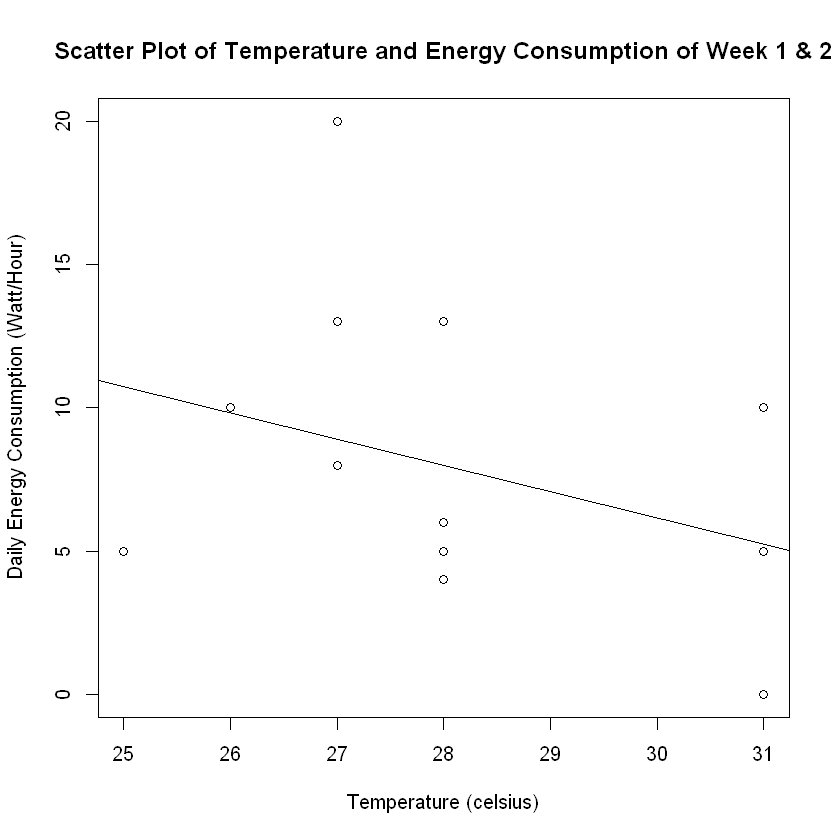

In [37]:
plot(week1_2$temperature_celsius,week1_2$daily_energy_consumption_watt_per_hour,main="Scatter Plot of Temperature and Energy Consumption of Week 1 & 2",xlab="Temperature (celsius)",ylab="Daily Energy Consumption (Watt/Hour)")
abline(model) #regression line

Now, since the actual daily energy consumption has not been taken yet, let's predict the daily energy consumption for week 3 using the model and the forecast of temperatures of weeks 1 and 2:

In [38]:
date_week3<-subset(df2,df2$week_number==3)
date_week3<-data.frame(date_week3$date)
date_week3

date_week3.date
1 11/4/2020      
2 11/5/2020      
3 11/6/2020      
4 11/7/2020      
5 11/8/2020      
6 11/9/2020      
7 11/10/2020

In [39]:
forecast_temp<- data.frame(day = c('Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday'),week_number=c(3,3,3,3,3,3,3),date_week3,"temperature_forecast(celsius)"=c(25,25,24,24,23,23,25))
forecast_temp

day       week_number date_week3.date temperature_forecast.celsius.
1 Wednesday 3           11/4/2020       25                           
2 Thursday  3           11/5/2020       25                           
3 Friday    3           11/6/2020       24                           
4 Saturday  3           11/7/2020       24                           
5 Sunday    3           11/8/2020       23                           
6 Monday    3           11/9/2020       23                           
7 Tuesday   3           11/10/2020      25

In [40]:
colnames(forecast_temp)<-c("day","week_number","date","temperature_celsius")

The column needed in forecasting is temperature_celsius so there will be new dataframe that has this column only.

In [41]:
temp3=data.frame(forecast_temp['temperature_celsius'])

In [42]:
predicted_energy_consumption=predict(model, newdata = temp3)
predicted_energy_consumption

1        2        3        4        5        6        7 
10.75038 10.75038 11.66514 11.66514 12.57991 12.57991 10.75038

The predicted data above shows that for Wednesday,Thursday and Tuesday (1,2,7), the daily energy consumption is 10.7503805175038 watt/hour. For Friday and Saturday(3,4), the daily energy consumption is 11.6651445966514 watt/hour. For Sunday and Monday, the daily energy consumption is 12.5799086757991 watt/hour.

We can use the prediction interval to find the range of daily energy consumption for each day

In [43]:
predict_week3<-predict(model,newdata=temp3,interval="prediction")
predict_week3

fit      lwr       upr     
1 10.75038 -1.320305 22.82107
2 10.75038 -1.320305 22.82107
3 11.66514 -1.089320 24.41961
4 11.66514 -1.089320 24.41961
5 12.57991 -1.006935 26.16675
6 12.57991 -1.006935 26.16675
7 10.75038 -1.320305 22.82107

The above table shows that for 95% of the days with temperature 25 celsius(temperatures of Wednesday,Thursday and Tuesday), the daily energy consumption ranges from -1.320305 watt/hour to 22.82107 watt/hour. For 95% of the days with temperature 24 celsius(temperatures of Friday and Saturday), the daily energy consumption ranges from -1.089320 watt/hour to 24.41961 watt/hour. For 95% of the days with temperature 23 celsius(temperatures of Sunday and Monday), the daily energy consumption ranges from -1.006935 watt/hour to 26.16675 watt/hour.

In [44]:
week3_predicted<-forecast_temp
week3_predicted<-cbind(week3_predicted,predicted_energy_consumption)

In [45]:
colnames(week3_predicted)=c("day","week_number","date","forecast_temperature_celsius","predicted_daily_energy_consumption_watt_per_hour")
week3_predicted

day       week_number date       forecast_temperature_celsius
1 Wednesday 3           11/4/2020  25                          
2 Thursday  3           11/5/2020  25                          
3 Friday    3           11/6/2020  24                          
4 Saturday  3           11/7/2020  24                          
5 Sunday    3           11/8/2020  23                          
6 Monday    3           11/9/2020  23                          
7 Tuesday   3           11/10/2020 25                          
  predicted_daily_energy_consumption_watt_per_hour
1 10.75038                                        
2 10.75038                                        
3 11.66514                                        
4 11.66514                                        
5 12.57991                                        
6 12.57991                                        
7 10.75038

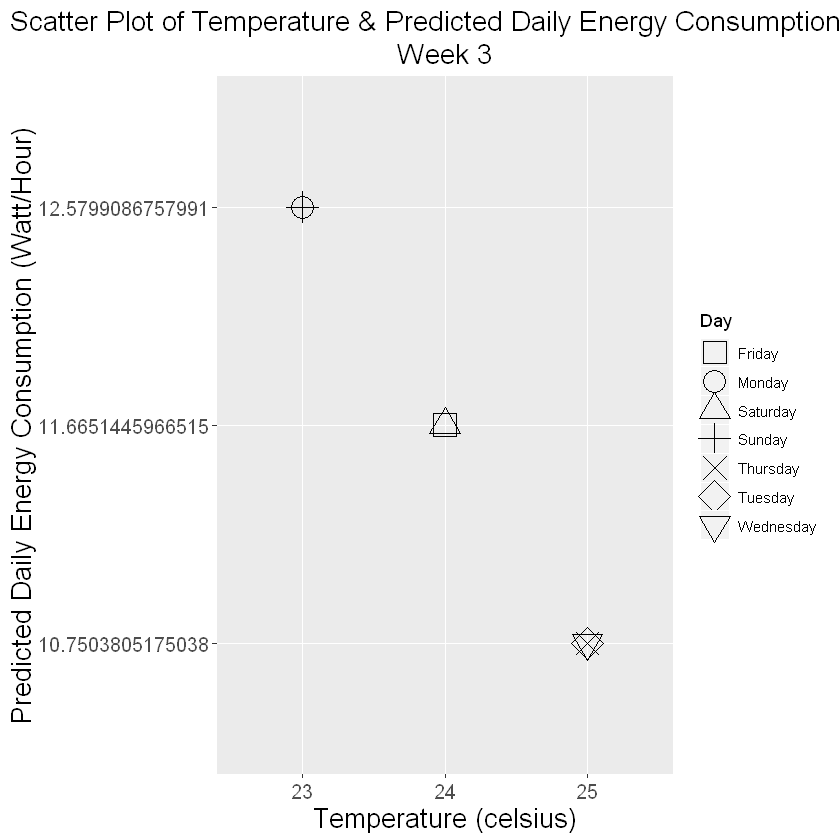

In [46]:
x1<-as.factor(week3_predicted$"forecast_temperature_celsius")
y1<-as.factor(week3_predicted$"predicted_daily_energy_consumption_watt_per_hour")
p<-ggplot(week3_predicted,aes(x=x1,y=y1,shape=day))
p+geom_point(size=6)+
xlab("Temperature (celsius)")+
ylab("Predicted Daily Energy Consumption (Watt/Hour)")+
ggtitle("Scatter Plot of Temperature & Predicted Daily Energy Consumption")+
labs(subtitle = "Week 3",shape="Day")+
scale_color_viridis(discrete=TRUE)+
scale_shape_manual(values=c(0,1,2,3,4,5,6))+
theme(plot.title=element_text(size=17,hjust=0.55),plot.subtitle=element_text(size=17,hjust=0.5),axis.text=element_text(size=12),axis.title=element_text(size=16))

In [47]:
date<-as.Date(week3_predicted$date,"%m/%d/%Y")

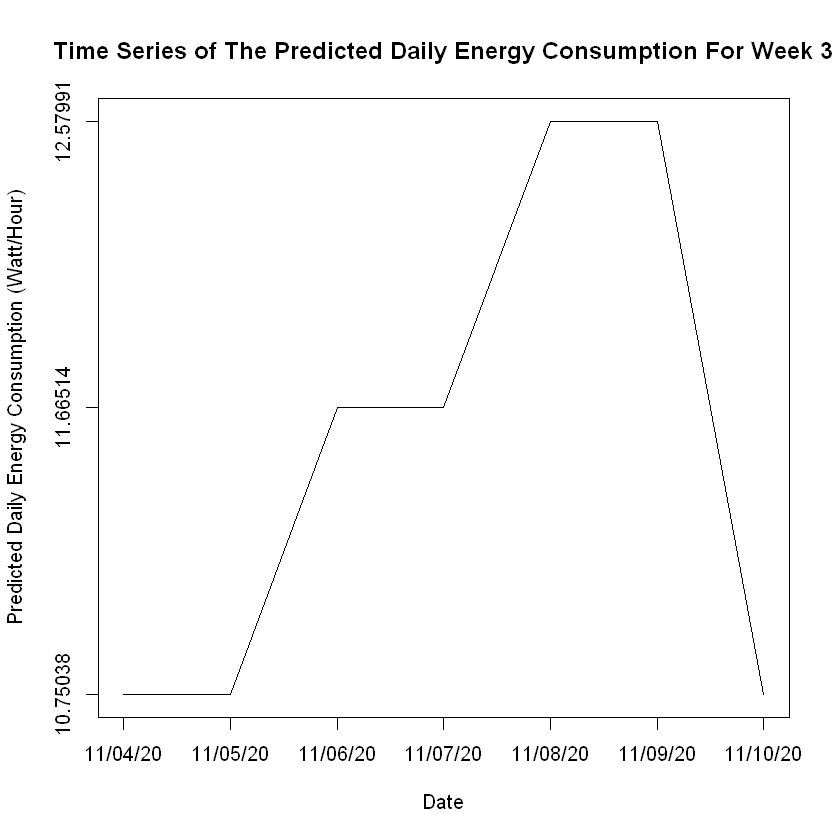

In [48]:
plot(week3_predicted$"predicted_daily_energy_consumption_watt_per_hour"~date,type='l',axes=FALSE,main="Time Series of The Predicted Daily Energy Consumption For Week 3",xlab="Date",ylab="Predicted Daily Energy Consumption (Watt/Hour)")
box()
axis(1,date,format(date,"%m/%d/%y")) #shows the month/day/last 2 digits of the year
axis(2,week3_predicted$"predicted_daily_energy_consumption_watt_per_hour")

#### Now, after having the actual data for week 3, we will  display: a line plot that shows the daily energy consumption and a scatter plot between temperature and the daily energy consumption of the third week. For each plot, there will be the predicted and the actual data.

##### Time Series for Daily Energy Consumption of Week 3

# This will be done in python. Make a data frame that includes both the predicted data and actual data

In [49]:
df_week3<-week3_predicted

In [50]:
week3<-subset(df2,df2$week_number==3)
actual_temp<-week3$"temperature_celsius"
actual_energy_consumption<-week3$"daily_energy_consumption_watt_per_hour"
df_week3<-cbind(df_week3,actual_temp)
df_week3<-cbind(df_week3,actual_energy_consumption)
df_week3

day       week_number date       forecast_temperature_celsius
1 Wednesday 3           11/4/2020  25                          
2 Thursday  3           11/5/2020  25                          
3 Friday    3           11/6/2020  24                          
4 Saturday  3           11/7/2020  24                          
5 Sunday    3           11/8/2020  23                          
6 Monday    3           11/9/2020  23                          
7 Tuesday   3           11/10/2020 25                          
  predicted_daily_energy_consumption_watt_per_hour actual_temp
1 10.75038                                         25         
2 10.75038                                         25         
3 11.66514                                         24         
4 11.66514                                         24         
5 12.57991                                         23         
6 12.57991                                         23         
7 10.75038                                         25         
  actual_energy_consumption
1 8                        
2 9                        
3 4                        
4 9                        
5 6                        
6 7                        
7 7

In [51]:
df_all<-rbind(df_all,df_week3)

##### Scatter Plot Between Temperature and Daily Energy Consumption of Week 3

# In python

## Forecasting week 4

### We will use the actual data of weeks 1,2,3

In [52]:
week1_2_3<-subset(df2,(df2$week_number==1 | df2$week_number==2 | df2$week_number==3))

In [53]:
cor(week1_2_3$"temperature_celsius", week1_2_3$"daily_energy_consumption_watt_per_hour") 

[1] -0.1103099

The correlation value shows that there is a very weak correlation between temperature and the daily energy consumption

In [54]:
model <- lm(daily_energy_consumption_watt_per_hour ~ temperature_celsius, data=week1_2_3)
model


Call:
lm(formula = daily_energy_consumption_watt_per_hour ~ temperature_celsius, 
    data = week1_2_3)

Coefficients:
        (Intercept)  temperature_celsius  
             12.856               -0.191  


The data above can be analyzed as:

daily energy consumption(watt/hour)= 12.856 - 0.191 * temperature(celsius)

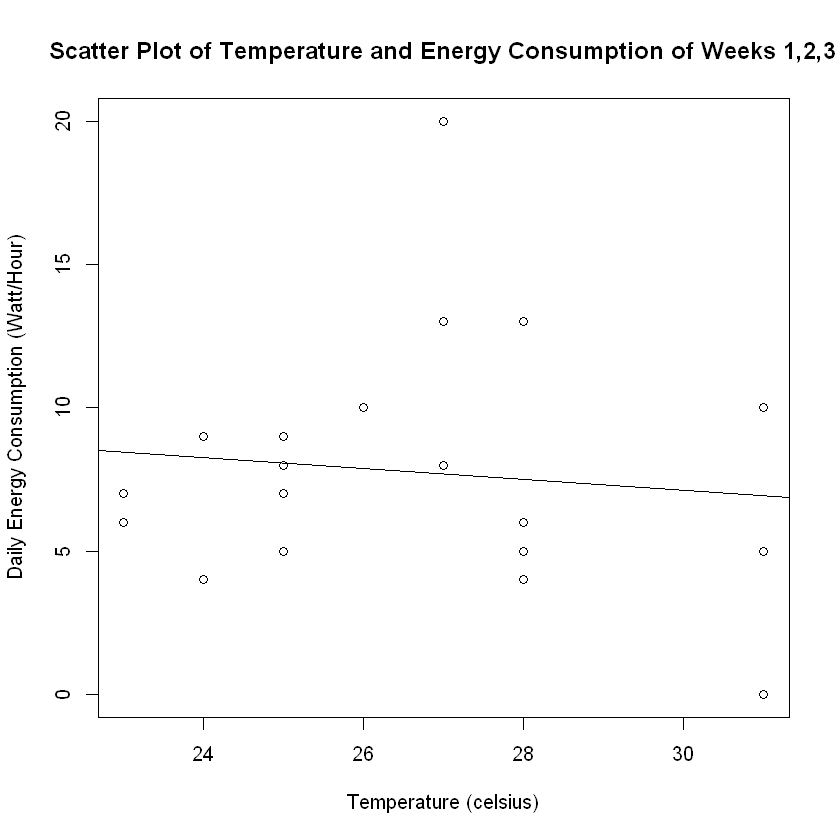

In [55]:
plot(week1_2_3$temperature_celsius,week1_2_3$daily_energy_consumption_watt_per_hour,main="Scatter Plot of Temperature and Energy Consumption of Weeks 1,2,3",xlab="Temperature (celsius)",ylab="Daily Energy Consumption (Watt/Hour)")
abline(model) #regression line

Now, since the actual daily energy consumption has not been taken yet, let's predict the daily energy consumption for week 4 using the model and the forecast of temperatures of weeks 1 and 2 and 3:

In [56]:
date_week4<-subset(df2,df2$week_number==4)
date_week4<-data.frame(date_week4$date)
date_week4

date_week4.date
1 11/11/2020     
2 11/12/2020     
3 11/13/2020     
4 11/14/2020     
5 11/15/2020     
6 11/16/2020     
7 11/17/2020

In [57]:
forecast_temp<- data.frame(day = c('Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday'),week_number=c(4,4,4,4,4,4,4),date_week4,"temperature_forecast(celsius)"=c(24,25,25,25,22,22,22))

In [58]:
colnames(forecast_temp)<-c("day","week_number","date","temperature_celsius")

The column needed in forecasting is temperature_celsius so there will be new dataframe that has this column only.

In [59]:
temp4=data.frame(forecast_temp['temperature_celsius'])

In [60]:
predicted_energy_consumption=predict(model, newdata = temp4)
predicted_energy_consumption

1        2        3        4        5        6        7 
8.271268 8.080257 8.080257 8.080257 8.653291 8.653291 8.653291

The predicted data above shows that for Wednesday (1), the daily energy consumption is 8.27126805778492 watt/hour. For Thursday, Friday and Saturday(2,3,4), the daily energy consumption is 8.08025682182986 watt/hour. For Sunday, Monday and Tuesday (5,6,7), the daily energy consumption is 8.65329052969503 watt/hour.

We can use the prediction interval to find the range of daily energy consumption for each day

In [61]:
predict_week4<-predict(model,newdata=temp4,interval="prediction")
predict_week4

fit      lwr       upr     
1 8.271268 -1.202619 17.74516
2 8.080257 -1.236140 17.39665
3 8.080257 -1.236140 17.39665
4 8.080257 -1.236140 17.39665
5 8.653291 -1.335234 18.64182
6 8.653291 -1.335234 18.64182
7 8.653291 -1.335234 18.64182

The above table shows that for 95% of the days with temperature 24 celsius(temperature of Wednesday), the daily energy consumption ranges from -1.202619 watt/hour to 17.74516 watt/hour. For 95% of the days with temperature 25 celsius(temperatures of Thursday, Friday and Saturday), the daily energy consumption ranges from -1.236140 watt/hour to 17.39665 watt/hour. For 95% of the days with temperature 22 celsius(temperatures of Sunday, Monday and Tuesday), the daily energy consumption ranges from -1.335234 watt/hour to 18.64182 watt/hour.

In [62]:
week4_predicted<-forecast_temp
week4_predicted<-cbind(week4_predicted,predicted_energy_consumption)

In [63]:
colnames(week4_predicted)=c("day","week_number","date","forecast_temperature_celsius","predicted_daily_energy_consumption_watt_per_hour")
week4_predicted

day       week_number date       forecast_temperature_celsius
1 Wednesday 4           11/11/2020 24                          
2 Thursday  4           11/12/2020 25                          
3 Friday    4           11/13/2020 25                          
4 Saturday  4           11/14/2020 25                          
5 Sunday    4           11/15/2020 22                          
6 Monday    4           11/16/2020 22                          
7 Tuesday   4           11/17/2020 22                          
  predicted_daily_energy_consumption_watt_per_hour
1 8.271268                                        
2 8.080257                                        
3 8.080257                                        
4 8.080257                                        
5 8.653291                                        
6 8.653291                                        
7 8.653291

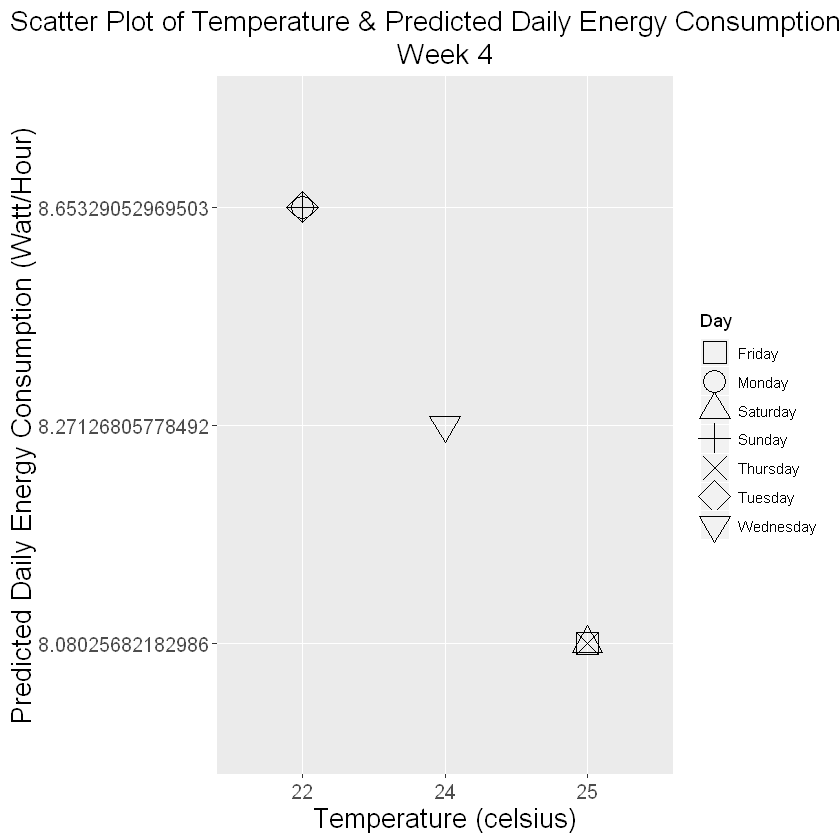

In [64]:
x1<-as.factor(week4_predicted$"forecast_temperature_celsius")
y1<-as.factor(week4_predicted$"predicted_daily_energy_consumption_watt_per_hour")
p<-ggplot(week4_predicted,aes(x=x1,y=y1,shape=day))
p+geom_point(size=6)+
xlab("Temperature (celsius)")+
ylab("Predicted Daily Energy Consumption (Watt/Hour)")+
ggtitle("Scatter Plot of Temperature & Predicted Daily Energy Consumption")+
labs(subtitle = "Week 4",shape="Day")+
scale_color_viridis(discrete=TRUE)+
scale_shape_manual(values=c(0,1,2,3,4,5,6))+
theme(plot.title=element_text(size=17,hjust=0.55),plot.subtitle=element_text(size=17,hjust=0.5),axis.text=element_text(size=12),axis.title=element_text(size=16))

In [65]:
date<-as.Date(week4_predicted$date,"%m/%d/%Y")

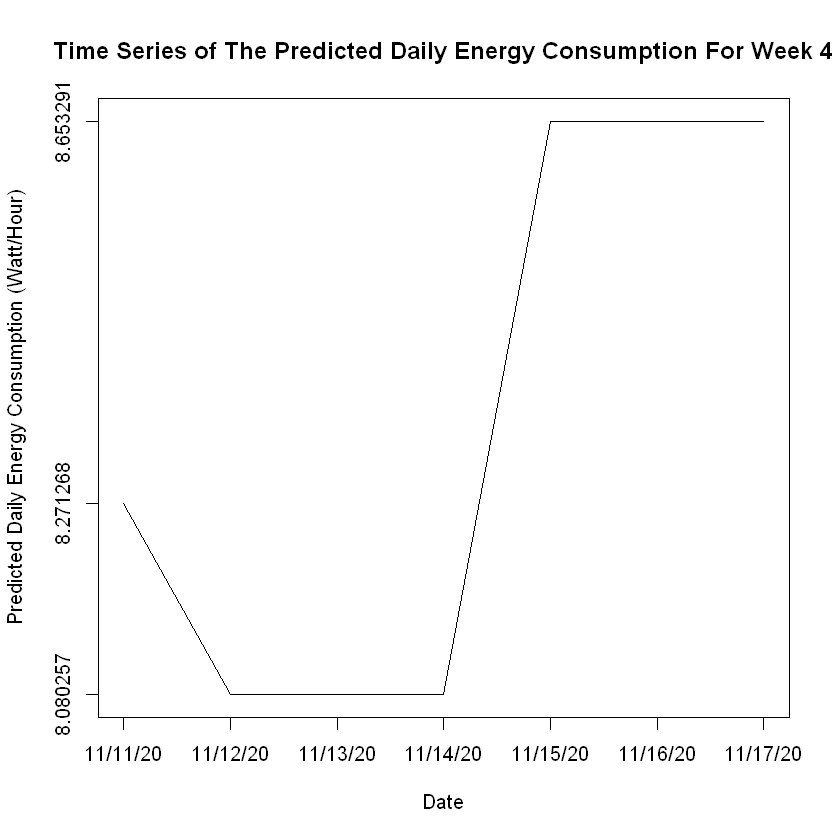

In [66]:
plot(week4_predicted$"predicted_daily_energy_consumption_watt_per_hour"~date,type='l',axes=FALSE,main="Time Series of The Predicted Daily Energy Consumption For Week 4",xlab="Date",ylab="Predicted Daily Energy Consumption (Watt/Hour)")
box()
axis(1,date,format(date,"%m/%d/%y")) #shows the month/day/last 2 digits of the year
axis(2,week4_predicted$"predicted_daily_energy_consumption_watt_per_hour")

#### Now, after having the actual data for week 3, we will  display: a line plot that shows the daily energy consumption and a scatter plot between temperature and the daily energy consumption of the third week. For each plot, there will be the predicted and the actual data.

##### Time Series for Daily Energy Consumption of Week 4

# This will be done in python. Make a data frame that includes both the predicted data and actual data

In [67]:
df_week4<-week4_predicted

In [68]:
week4<-subset(df2,df2$week_number==4)
actual_temp<-week4$"temperature_celsius"
actual_energy_consumption<-week4$"daily_energy_consumption_watt_per_hour"
df_week4<-cbind(df_week4,actual_temp)
df_week4<-cbind(df_week4,actual_energy_consumption)
df_week4

day       week_number date       forecast_temperature_celsius
1 Wednesday 4           11/11/2020 24                          
2 Thursday  4           11/12/2020 25                          
3 Friday    4           11/13/2020 25                          
4 Saturday  4           11/14/2020 25                          
5 Sunday    4           11/15/2020 22                          
6 Monday    4           11/16/2020 22                          
7 Tuesday   4           11/17/2020 22                          
  predicted_daily_energy_consumption_watt_per_hour actual_temp
1 8.271268                                         24         
2 8.080257                                         25         
3 8.080257                                         25         
4 8.080257                                         25         
5 8.653291                                         22         
6 8.653291                                         22         
7 8.653291                                         22         
  actual_energy_consumption
1 6                        
2 9                        
3 5                        
4 9                        
5 3                        
6 8                        
7 6

In [69]:
df_all<-rbind(df_all,df_week4)

##### Scatter Plot Between Temperature and Daily Energy Consumption of Week 3

# Found in python

There are 3 days in week 5, so we will use the actual data in all previours weeks to predict them

### Forecasting week 5

In [70]:
week1_2_3_4<-subset(df2,(df2$week_number==1 | df2$week_number==2 | df2$week_number==3 | df2$week_number==4))

In [71]:
cor(week1_2_3_4$"temperature_celsius", week1_2_3_4$"daily_energy_consumption_watt_per_hour") 

[1] 0.0201279

The correlation value shows that there is a very weak positive correlation between temperature and the daily energy consumption.

In [72]:
model <- lm(daily_energy_consumption_watt_per_hour ~ temperature_celsius, data=week1_2_3_4)
model


Call:
lm(formula = daily_energy_consumption_watt_per_hour ~ temperature_celsius, 
    data = week1_2_3_4)

Coefficients:
        (Intercept)  temperature_celsius  
            6.69990              0.02952  


The data above can be analyzed as:

daily energy consumption(watt/hour)= 6.69990 + 0.02952 * temperature(celsius)

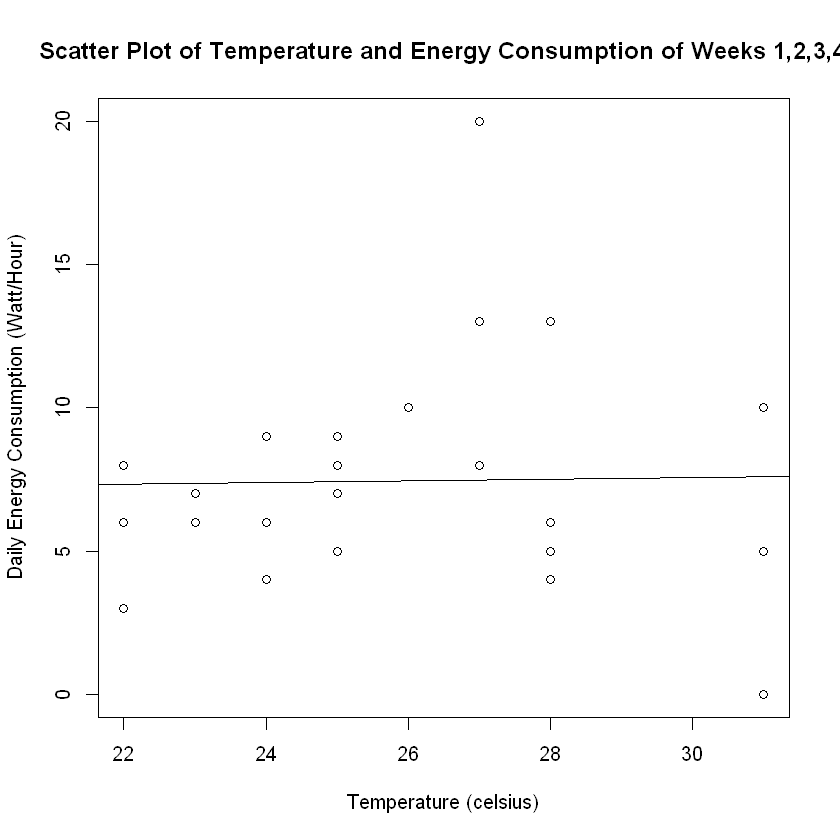

In [73]:
plot(week1_2_3_4$temperature_celsius,week1_2_3_4$daily_energy_consumption_watt_per_hour,main="Scatter Plot of Temperature and Energy Consumption of Weeks 1,2,3,4",xlab="Temperature (celsius)",ylab="Daily Energy Consumption (Watt/Hour)")
abline(model) #regression line

Now, since the actual daily energy consumption has not been taken yet, let's predict the daily energy consumption for week 5 using the model and the forecast of temperatures of weeks 1 and 2 and 3 and 4:

In [74]:
date_week5<-subset(df2,df2$week_number==5)
date_week5<-data.frame(date_week5$date)
date_week5

date_week5.date
1 11/18/2020     
2 11/19/2020     
3 11/20/2020

In [75]:
forecast_temp<- data.frame(day = c('Wednesday','Thursday','Friday'),week_number=c(5,5,5),date_week5,"temperature_forecast(celsius)"=c(25,23,21))

In [76]:
colnames(forecast_temp)<-c("day","week_number","date","temperature_celsius")

The column needed in forecasting is temperature_celsius so there will be new dataframe that has this column only.

In [77]:
temp5=data.frame(forecast_temp['temperature_celsius'])

In [78]:
predicted_energy_consumption=predict(model, newdata = temp5)
predicted_energy_consumption

1        2        3 
7.437928 7.378886 7.319844

The predicted data above shows that for Wednesday (1), the daily energy consumption is 7.43792766373411 watt/hour. For Thursday (2), the daily energy consumption is 7.37888563049853 watt/hour. For Friday (3), the daily energy consumption is 7.31984359726294 watt/hour.

We can use the prediction interval to find the range of the daily energy consumption 

In [79]:
predict_week5<-predict(model,newdata=temp5,interval="prediction")
predict_week5

fit      lwr        upr     
1 7.437928 -0.7102140 15.58607
2 7.378886 -0.9300203 15.68779
3 7.319844 -1.3102830 15.94997

The above table shows that for 95% of the days with temperature 25 celsius(temperature of Wednesday), the daily energy consumption ranges from -0.7102140 watt/hour to 15.58607 watt/hour. For 95% of the days with temperature 23 celsius(temperature of Thursday), the daily energy consumption ranges from -0.9300203 watt/hour to 15.68779 watt/hour. For 95% of the days with temperature 21 celsius(temperature of Friday), the daily energy consumption ranges from -1.3102830 watt/hour to 15.94997 watt/hour.

In [80]:
week5_predicted<-forecast_temp
week5_predicted<-cbind(week5_predicted,predicted_energy_consumption)

In [81]:
colnames(week5_predicted)=c("day","week_number","date","forecast_temperature_celsius","predicted_daily_energy_consumption_watt_per_hour")
week5_predicted

day       week_number date       forecast_temperature_celsius
1 Wednesday 5           11/18/2020 25                          
2 Thursday  5           11/19/2020 23                          
3 Friday    5           11/20/2020 21                          
  predicted_daily_energy_consumption_watt_per_hour
1 7.437928                                        
2 7.378886                                        
3 7.319844

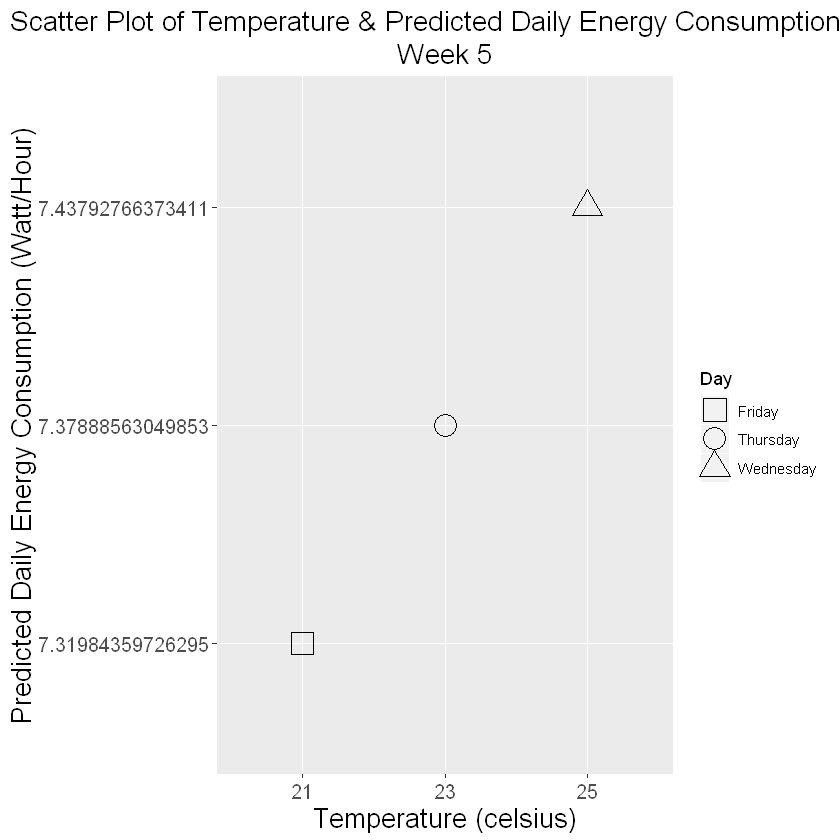

In [82]:
x1<-as.factor(week5_predicted$"forecast_temperature_celsius")
y1<-as.factor(week5_predicted$"predicted_daily_energy_consumption_watt_per_hour")
p<-ggplot(week5_predicted,aes(x=x1,y=y1,shape=day))
p+geom_point(size=6)+
xlab("Temperature (celsius)")+
ylab("Predicted Daily Energy Consumption (Watt/Hour)")+
ggtitle("Scatter Plot of Temperature & Predicted Daily Energy Consumption")+
labs(subtitle = "Week 5",shape="Day")+
scale_color_viridis(discrete=TRUE)+
scale_shape_manual(values=c(0,1,2,3,4,5,6))+
theme(plot.title=element_text(size=17,hjust=0.55),plot.subtitle=element_text(size=17,hjust=0.5),axis.text=element_text(size=12),axis.title=element_text(size=16))

In [83]:
date<-as.Date(week5_predicted$date,"%m/%d/%Y")

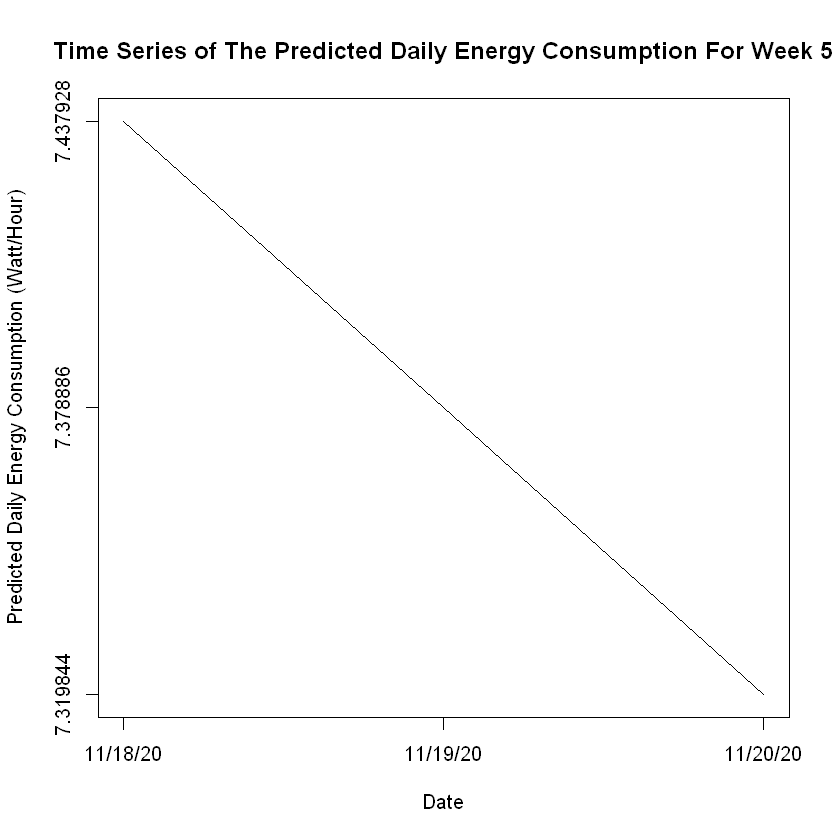

In [84]:
plot(week5_predicted$"predicted_daily_energy_consumption_watt_per_hour"~date,type='l',axes=FALSE,main="Time Series of The Predicted Daily Energy Consumption For Week 5",xlab="Date",ylab="Predicted Daily Energy Consumption (Watt/Hour)")
box()
axis(1,date,format(date,"%m/%d/%y")) #shows the month/day/last 2 digits of the year
axis(2,week5_predicted$"predicted_daily_energy_consumption_watt_per_hour")

#### Now, after having the actual data for week 5, we will  display: a line plot that shows the daily energy consumption and a scatter plot between temperature and the daily energy consumption of the fifth week. For each plot, there will be the predicted and the actual data.

##### Time Series for Daily Energy Consumption of Week 5

# This will be done in python. Make a data frame that includes both the predicted data and actual data

In [85]:
df_week5<-week5_predicted

In [86]:
week5<-subset(df2,df2$week_number==5)
actual_temp<-week5$"temperature_celsius"
actual_energy_consumption<-week5$"daily_energy_consumption_watt_per_hour"
df_week5<-cbind(df_week5,actual_temp)
df_week5<-cbind(df_week5,actual_energy_consumption)
df_week5

day       week_number date       forecast_temperature_celsius
1 Wednesday 5           11/18/2020 25                          
2 Thursday  5           11/19/2020 23                          
3 Friday    5           11/20/2020 21                          
  predicted_daily_energy_consumption_watt_per_hour actual_temp
1 7.437928                                         25         
2 7.378886                                         23         
3 7.319844                                         21         
  actual_energy_consumption
1 5                        
2 2                        
3 2

In [87]:
df_all<-rbind(df_all,df_week5)

In [88]:
df_all

day       week_number date       forecast_temperature_celsius
1  Wednesday 2           10/28/2020 28                          
2  Thursday  2           10/29/2020 28                          
3  Friday    2           10/30/2020 28                          
4  Saturday  2           10/31/2020 27                          
5  Sunday    2           11/1/2020  26                          
6  Monday    2           11/2/2020  26                          
7  Tuesday   2           11/3/2020  25                          
11 Wednesday 3           11/4/2020  25                          
21 Thursday  3           11/5/2020  25                          
31 Friday    3           11/6/2020  24                          
41 Saturday  3           11/7/2020  24                          
51 Sunday    3           11/8/2020  23                          
61 Monday    3           11/9/2020  23                          
71 Tuesday   3           11/10/2020 25                          
12 Wednesday 4           11/11/2020 24                          
22 Thursday  4           11/12/2020 25                          
32 Friday    4           11/13/2020 25                          
42 Saturday  4           11/14/2020 25                          
52 Sunday    4           11/15/2020 22                          
62 Monday    4           11/16/2020 22                          
72 Tuesday   4           11/17/2020 22                          
13 Wednesday 5           11/18/2020 25                          
23 Thursday  5           11/19/2020 23                          
33 Friday    5           11/20/2020 21                          
   predicted_daily_energy_consumption_watt_per_hour actual_temp
1  10.000000                                        28         
2  10.000000                                        28         
3  10.000000                                        28         
4  12.000000                                        27         
5  14.000000                                        26         
6  14.000000                                        26         
7  16.000000                                        25         
11 10.750381                                        25         
21 10.750381                                        25         
31 11.665145                                        24         
41 11.665145                                        24         
51 12.579909                                        23         
61 12.579909                                        23         
71 10.750381                                        25         
12  8.271268                                        24         
22  8.080257                                        25         
32  8.080257                                        25         
42  8.080257                                        25         
52  8.653291                                        22         
62  8.653291                                        22         
72  8.653291                                        22         
13  7.437928                                        25         
23  7.378886                                        23         
33  7.319844                                        21         
   actual_energy_consumption
1  13                       
2   5                       
3   6                       
4   8                       
5  10                       
6  10                       
7   5                       
11  8                       
21  9                       
31  4                       
41  9                       
51  6                       
61  7                       
71  7                       
12  6                       
22  9                       
32  5                       
42  9                       
52  3                       
62  8                       
72  6                       
13  5                       
23  2                       
33  2

##### Scatter Plot Between Temperature and Daily Energy Consumption of Week 3

## In python

Now, we will write the data frame that include predicted and actual data to csv file to be used in python

### Forecasting the additional week (21/11 - 27/11)

In [94]:
df_additional_week<-read.csv("D:/Fall 2020/Data Visualization/Project/additional week.csv")
df_additional_week

ï..Day.Number Week.Number Day       Date       Month    Time..pm.
1 32            6           Saturday  11/21/2020 November 1:00     
2 33            6           Sunday    11/22/2020 November 1:00     
3 34            6           Monday    11/23/2020 November 1:00     
4 35            6           Tuesday   11/24/2020 November 1:00     
5 36            6           Wednesday 11/25/2020 November 1:00     
6 37            6           Thursday  11/26/2020 November 1:00     
7 38            6           Friday    11/27/2020 November 1:00     
  Temperature.celsius. Meter.Reading..watt.hour.
1 20                   83955                    
2 22                   83976                    
3 23                   83984                    
4 23                   83992                    
5 21                   83996                    
6 21                   84001                    
7 21                   84009

The above data frame is the data of the additional week (21/11 -27/11). The day number starts from 32 since we are counting since the beginning of collecting data. Although week 5 had only 3 days, this data frame has week number of 6 to distinguish it from the rest of the month for easier forecasting and visualiztion.

We will use the data of the previous 30 days to create a model and make a forecast for the week (21/11 - 27/11)

In [90]:
df_month<-df2

In [91]:
cor(df_month$"temperature_celsius", df_month$"daily_energy_consumption_watt_per_hour") 

[1] 0.1492149

There is a weak positive correlation between the temperature and the daily energy consumption.

In [92]:
model <- lm(daily_energy_consumption_watt_per_hour ~ temperature_celsius, data=df_month)
model


Call:
lm(formula = daily_energy_consumption_watt_per_hour ~ temperature_celsius, 
    data = df_month)

Coefficients:
        (Intercept)  temperature_celsius  
             1.4636               0.2174  


The data above can be analyzed as:

daily energy consumption(watt/hour)= 1.4636 + 0.2174 * temperature(celsius)

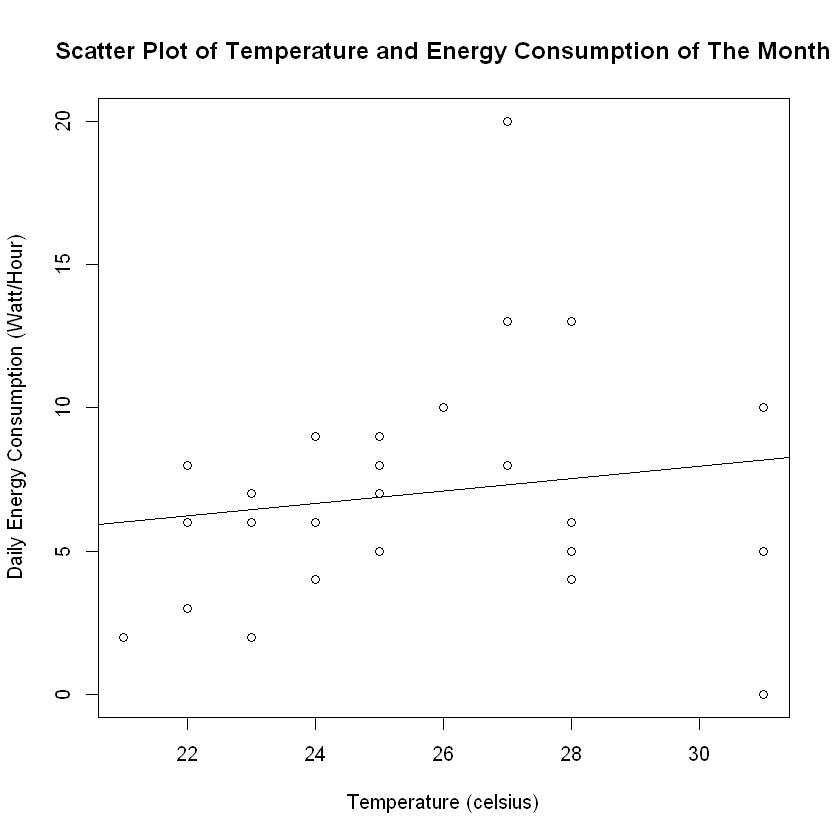

In [93]:
plot(df_month$temperature_celsius,df_month$daily_energy_consumption_watt_per_hour,main="Scatter Plot of Temperature and Energy Consumption of The Month",xlab="Temperature (celsius)",ylab="Daily Energy Consumption (Watt/Hour)")
abline(model) #regression line

Now, since the actual daily energy consumption has not been taken yet, let's predict the daily energy consumption for the additional week (21/11 - 27/11) using the model and the forecast of temperatures of the previous month:

### To get the daily energy consumption, we should get the difference in meter reading between two consecutive days.The energy consumption of the first day only will be set to zero.

In [111]:
df_additional_2<-df_additional_week
#the 1st element in the list of daily energy consumption is the difference between meter reading of the last day in the previous month and the first day of the additional week
first<-df_additional_2[1,"Meter.Reading..watt.hour."]
last<-df2[31,"meter_reading_watt_per_hour)"] #83953
temp<-first-last

In [114]:
energy_consumption<-c(temp) #list stores the daily energy consumption
for (i in 1:nrow(df_additional_2)-1) {
    temp<-df_additional_2[i+1,8]-df_additional_2[i,8]
    energy_consumption=c(energy_consumption,temp)
}

In [116]:
length(energy_consumption) # ensure that the list contains the daily energy consumption for the whole week

[1] 7

In [117]:
df_additional_2=cbind(df_additional_2, energy_consumption)

In [118]:
head(df_additional_2)

ï..Day.Number Week.Number Day       Date       Month    Time..pm.
1 32            6           Saturday  11/21/2020 November 1:00     
2 33            6           Sunday    11/22/2020 November 1:00     
3 34            6           Monday    11/23/2020 November 1:00     
4 35            6           Tuesday   11/24/2020 November 1:00     
5 36            6           Wednesday 11/25/2020 November 1:00     
6 37            6           Thursday  11/26/2020 November 1:00     
  Temperature.celsius. Meter.Reading..watt.hour. energy_consumption
1 20                   83955                      2                
2 22                   83976                     21                
3 23                   83984                      8                
4 23                   83992                      8                
5 21                   83996                      4                
6 21                   84001                      5

Changing the name of columns to be more meaningful:

In [120]:
colnames(df_additional_2)=c('day_number','week_number','day','date','month','time_pm','temperature_celsius','meter_reading_watt_per_hour)','daily_energy_consumption_watt_per_hour')
df_additional_2

day_number week_number day       date       month    time_pm
1 32         6           Saturday  11/21/2020 November 1:00   
2 33         6           Sunday    11/22/2020 November 1:00   
3 34         6           Monday    11/23/2020 November 1:00   
4 35         6           Tuesday   11/24/2020 November 1:00   
5 36         6           Wednesday 11/25/2020 November 1:00   
6 37         6           Thursday  11/26/2020 November 1:00   
7 38         6           Friday    11/27/2020 November 1:00   
  temperature_celsius meter_reading_watt_per_hour)
1 20                  83955                       
2 22                  83976                       
3 23                  83984                       
4 23                  83992                       
5 21                  83996                       
6 21                  84001                       
7 21                  84009                       
  daily_energy_consumption_watt_per_hour
1  2                                    
2 21                                    
3  8                                    
4  8                                    
5  4                                    
6  5                                    
7  8

In [123]:
date_week_additional<-data.frame(df_additional_2$date)
date_week_additional

df_additional_2.date
1 11/21/2020          
2 11/22/2020          
3 11/23/2020          
4 11/24/2020          
5 11/25/2020          
6 11/26/2020          
7 11/27/2020

In [124]:
forecast_temp<- data.frame(day = c('Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'),week_number=c(6,6,6,6,6,6,6),date_week_additional,"temperature_forecast(celsius)"=c(20,22,23,23,21,21,21))

In [125]:
colnames(forecast_temp)<-c("day","week_number","date","temperature_celsius")

The column needed in forecasting is temperature_celsius so there will be new dataframe that has this column only.

In [127]:
temp_add=data.frame(forecast_temp['temperature_celsius'])

In [129]:
predicted_energy_consumption=predict(model, newdata = temp_add)
predicted_energy_consumption

1        2        3        4        5        6        7 
5.811914 6.246749 6.464167 6.464167 6.029332 6.029332 6.029332

The predicted data above shows that for Saturday (1), the daily energy consumption is 5.81191412156033 watt/hour. For Sunday (2), the daily energy consumption is 6.24674931962504 watt/hour. For Monday and Tuesday (3,4), the daily energy consumption is 6.4641669186574 watt/hour. For Wednesday, Thursday and Friday (5,6,7), the daily energy consumption is 6.02933172059269 watt/hour.

We can use the prediction interval to find the range of daily energy consumption for each day

In [130]:
predict_week_add<-predict(model,newdata=temp_add,interval="prediction")
predict_week_add

fit      lwr       upr     
1 5.811914 -2.869967 14.49379
2 6.246749 -2.110905 14.60440
3 6.464167 -1.781213 14.70955
4 6.464167 -1.781213 14.70955
5 6.029332 -2.474391 14.53305
6 6.029332 -2.474391 14.53305
7 6.029332 -2.474391 14.53305

The above table shows that for 95% of the days with temperature 20 celsius(temperature of Saturday), the daily energy consumption ranges from -2.869967 watt/hour to 14.49379 watt/hour. For 95% of the days with temperature 22 celsius(temperature of Sunday), the daily energy consumption ranges from -2.110905 watt/hour to 14.60440 watt/hour. For 95% of the days with temperature 23 celsius(temperatures of Monday and Tuesday), the daily energy consumption ranges from -1.781213 watt/hour to 14.70955 watt/hour. For 95% of the days with temperature 21 celsius(temperatures of Wednesday,Thursday and Friday), the daily energy consumption ranges from -2.474391 watt/hour to 14.53305 watt/hour.

In [136]:
week_add_predicted<-forecast_temp
week_add_predicted<-cbind(week_add_predicted,predicted_energy_consumption)

In [137]:
colnames(week_add_predicted)=c("day","week_number","date","forecast_temperature_celsius","predicted_daily_energy_consumption_watt_per_hour")
week_add_predicted

day       week_number date       forecast_temperature_celsius
1 Saturday  6           11/21/2020 20                          
2 Sunday    6           11/22/2020 22                          
3 Monday    6           11/23/2020 23                          
4 Tuesday   6           11/24/2020 23                          
5 Wednesday 6           11/25/2020 21                          
6 Thursday  6           11/26/2020 21                          
7 Friday    6           11/27/2020 21                          
  predicted_daily_energy_consumption_watt_per_hour
1 5.811914                                        
2 6.246749                                        
3 6.464167                                        
4 6.464167                                        
5 6.029332                                        
6 6.029332                                        
7 6.029332

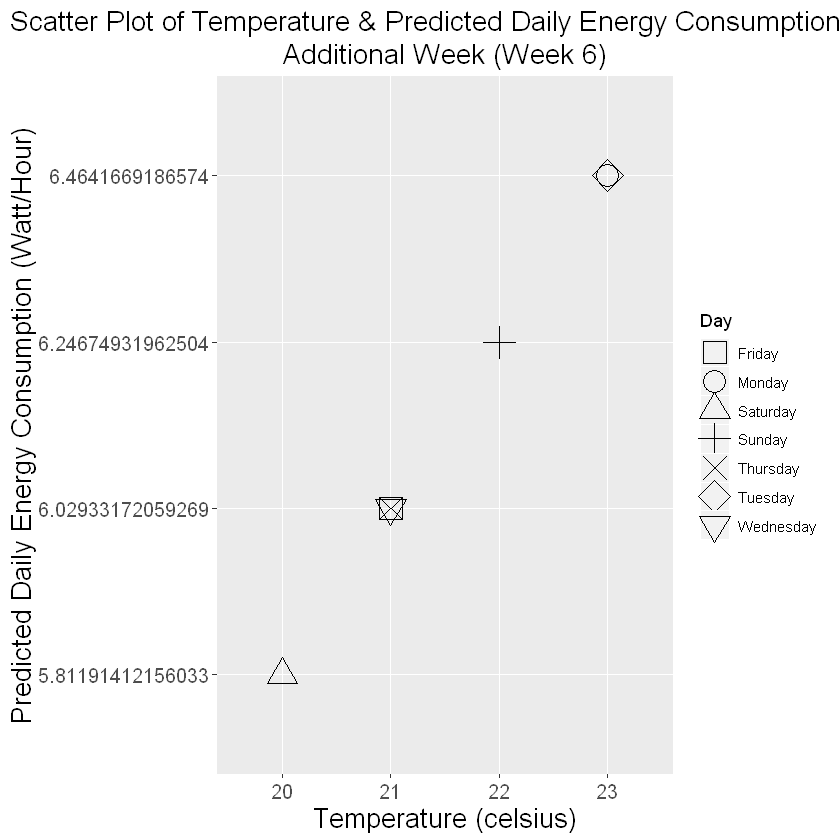

In [139]:
x1<-as.factor(week_add_predicted$"forecast_temperature_celsius")
y1<-as.factor(week_add_predicted$"predicted_daily_energy_consumption_watt_per_hour")
p<-ggplot(week_add_predicted,aes(x=x1,y=y1,shape=day))
p+geom_point(size=6)+
xlab("Temperature (celsius)")+
ylab("Predicted Daily Energy Consumption (Watt/Hour)")+
ggtitle("Scatter Plot of Temperature & Predicted Daily Energy Consumption")+
labs(subtitle = "Additional Week (Week 6)",shape="Day")+
scale_color_viridis(discrete=TRUE)+
scale_shape_manual(values=c(0,1,2,3,4,5,6))+
theme(plot.title=element_text(size=17,hjust=0.55),plot.subtitle=element_text(size=17,hjust=0.5),axis.text=element_text(size=12),axis.title=element_text(size=16))

In [140]:
date<-as.Date(week_add_predicted$date,"%m/%d/%Y")

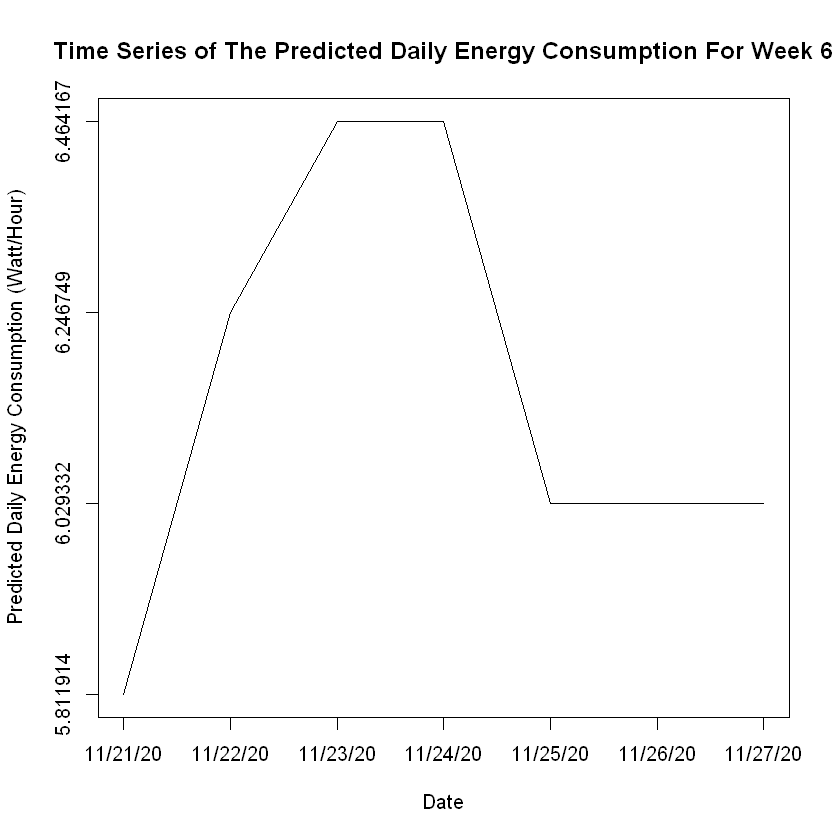

In [141]:
plot(week_add_predicted$"predicted_daily_energy_consumption_watt_per_hour"~date,type='l',axes=FALSE,main="Time Series of The Predicted Daily Energy Consumption For Week 6",xlab="Date",ylab="Predicted Daily Energy Consumption (Watt/Hour)")
box()
axis(1,date,format(date,"%m/%d/%y")) #shows the month/day/last 2 digits of the year
axis(2,week_add_predicted$"predicted_daily_energy_consumption_watt_per_hour")

Now, after having the actual data for week 3, we will display: a line plot that shows the daily energy consumption and a scatter plot between temperature and the daily energy consumption of the third week. For each plot, there will be the predicted and the actual data.

##### Time Series for Daily Energy Consumption of Week 4

### This will be done in python. Make a data frame that includes both the predicted data and actual data

In [145]:
df_week_add<-week_add_predicted

In [146]:
actual_temp<-df_additional_2$"temperature_celsius"
actual_energy_consumption<-df_additional_2$"daily_energy_consumption_watt_per_hour"
df_week_add<-cbind(df_week_add,actual_temp)
df_week_add<-cbind(df_week_add,actual_energy_consumption)
df_week_add

day       week_number date       forecast_temperature_celsius
1 Saturday  6           11/21/2020 20                          
2 Sunday    6           11/22/2020 22                          
3 Monday    6           11/23/2020 23                          
4 Tuesday   6           11/24/2020 23                          
5 Wednesday 6           11/25/2020 21                          
6 Thursday  6           11/26/2020 21                          
7 Friday    6           11/27/2020 21                          
  predicted_daily_energy_consumption_watt_per_hour actual_temp
1 5.811914                                         20         
2 6.246749                                         22         
3 6.464167                                         23         
4 6.464167                                         23         
5 6.029332                                         21         
6 6.029332                                         21         
7 6.029332                                         21         
  actual_energy_consumption
1  2                       
2 21                       
3  8                       
4  8                       
5  4                       
6  5                       
7  8

In [147]:
df_all<-rbind(df_all,df_week_add)

In [149]:
write.csv(df_all,"D:/Fall 2020/Data Visualization/Project/modified data.csv", row.names = FALSE)